# 과제 4 & 5 & 6: 관계에 대한 이해 및 그래프 생성/분석
---
박정현(pwjdgus1017@donga.ac.kr), 배정훈(rhenus9911@gmail.com), 최재혁(fkdlfkdl68@donga.ac.kr), 권건우(a71463092@gmail.com)
---
우리는 관계 강의를 통해 그래프에 대한 구성을 이론적으로 학습하였다. 구체적으로, 유향/무향 그래프 및 관계행렬 등을 그래프 표현으로 배웠다. 하지만, 강의에서 학습한 데이터는 단순한 숫자(1,2,3,..)/문자형(a,b,c,..)이었기 때문에 실제 세계에서 적용하기는 어렵다.

본 프로그래밍 과정을 통해, 실제 데이터를 어떻게 그래프 모델로 표현하고, 또한 그래프의 이론적인 방법을 실용적으로 어떻게 응용하는지에 대해서 배울 예정이다.




# 해당파일 활용 방법- [메뉴] 파일->드라이브에 사본 저장을 통해서 프로그램 실행하시면 됩니다.

# 과제 도우미 학생을 통해 문제 해결이 어려운 경우, 가상대학의 문의게시판에 궁금한 부분을 게재하시기 바랍니다.

# numpy 사용하기
Numpy는 C언어로 구현된 파이썬 라이브러리로써, 고성능의 수치계산을 위해 제작되었습니다. Numpy(Numerical Python의 줄임말)는 벡터 및 행렬 연산에 있어서 매우 편리한 기능을 제공합니다.

이미 경험한 pandas와 matplotlib의 기반으로 사용될 수 도 있습니다. 예로, 라이브러리를 사용하면 numpy의 행렬을 pandas데이터로 변환할 수 있습니다.

기본적으로 Numpy는 배열/행렬(array) 단위로 데이터를 기본으로합니다. 따라서 1d, 2d, 3d(d는 차원으로써 dimention의 약어)에 기반한 배열 연산을 수행합니다.


** numpy는 워낙 방대하기 때문에 본 챕터에서는 관계행렬 혹은 가중치 그래프 중심의 행렬 연산을 주로 배울 예정입니다.


세부적으로, 공부하고 싶은 학생은 "파이썬과 NumPy로 배우는 선형대수", "Mastering Numerical Computing with NumPy" 등와 같은 도서를 구입하고 별도로 공부하길 바랍니다.

## numpy 데이터 선언하기

In [1]:
import numpy as np

In [44]:
data1 = [1,2,3,4,5]
data1

[1, 2, 3, 4, 5]

In [45]:
arr1 = np.array(data1)
arr1

array([1, 2, 3, 4, 5])

In [46]:
arr1.shape

(5,)

In [47]:
arr4 = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
arr4

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [48]:
np.zeros((3,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [49]:
np.ones((3, 3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

## numpy 데이터간 연산하기

In [50]:
arr1 = np.array([[True,True],[False, False]])

In [51]:
arr2 = np.array([[True,True],[True, False]])

In [10]:
# 논리합 계산하기
# astype(int)를 통해서 True/False 값을 0/1로 변환하기
np.logical_and(arr1, arr2).astype(int)

array([[1, 1],
       [0, 0]])

# 관계에 대한 이해


In [59]:
def gen_rand_boolean_matrix(N):
  arr = np.full((N,N), False)
  idx = np.random.randint(N, size=N)

  # replace "False" by "True" at given indices
  arr[range(N), idx] = True
  return arr

In [60]:
M = 8
R = gen_rand_boolean_matrix(M)
R.astype(int)

array([[0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0]])

In [61]:
S = gen_rand_boolean_matrix(M)#이러면 S는 자동으로 8*8크기가 됨
S.astype(int)

array([[0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0]])

In [62]:
R_and_S = np.logical_and(R,S)
R_and_S

array([[False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False]])

In [63]:
R_and_S.astype(int)

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

## 문제 4-1: 부울곱(Boolean Product)을 생성하시오

In [90]:
def my_boolean_product(R, S):
  '''
  주어진 관계 매트릭스로부터 부울곱 (Boolean Product)한 결과를 계산하시오
  :param R: NxN Boolean 기반 관계행렬
  :param S: NxN Boolean 기반 관계행렬
  :return: NxN Boolean 기반 관계행렬
  '''
  N = R.shape[0]
  M = np.full((N, N), False)

  for i in range(N):
    for j in range(N):
      for k in range(N):
        if R[i, k] and S[k, j]:
          M[i, j] = True
        break
  M = M.astype(int)

  #M = R@S도 가
  return M

In [91]:
my_boolean_product(R,S)

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

## 문제 4-2: Transitive Relation, Symmetric Relation, Reflexive Relation
주어진 행렬 M이 Transitive Relation, Symmetric Relation, Reflexive Relation, 만족하는 지를 확인하는 메소드를 만드시오

In [92]:
def is_transitive_relation(M):
  '''
  추이 관계인지를 확인하는 함수
  :param M: NxN Boolean 기반 관계행렬
  :return: True / False
  '''
  M_squared = (M @ M) > 0
  return np.all(M_squared <= M)

In [93]:
def is_symmetric_relation(M):
  '''
  대칭 관계인지를 확인하는 함수
  :param M: NxN Boolean 기반 관계행렬
  :return: True / False
  '''
  return np.all(M == M.T)

In [94]:
def is_reflexive_relation(M):
  '''
  반사 관계인지를 확인하는 함수
  :param M: NxN Boolean 기반 관계행렬
  :return: True / False
  '''
  return np.all(np.diag(M))

In [95]:
M = np.full((3,3), True)
M

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [96]:
is_transitive_relation(M)

np.True_

In [97]:
is_symmetric_relation(M)

np.True_

In [98]:
is_reflexive_relation(M)

np.True_

In [99]:
M = np.full((3,3), False)
M

array([[False, False, False],
       [False, False, False],
       [False, False, False]])

In [100]:
is_transitive_relation(M)

np.True_

In [101]:
is_symmetric_relation(M)

np.True_

In [102]:
is_reflexive_relation(M)

np.False_

## 문제 4-3: Equivalence relation
is_transitive, is_symmetric, is_reflexive_relation 메소드를 활용하여 equivalence relation인지를 확인하는 메소드를 생성하시오


In [103]:
def is_equivalence_relation(M):
  '''
  동치 관계인지를 확인하는 함수
  :param M: NxN Boolean 기반 관계행렬
  :return: True / False
  '''
  #동치관계는 추이 반사 대칭 모두 만족해야됨
  return is_reflexive_relation(M) and is_symmetric_relation(M) and is_transitive_relation(M)

In [104]:
M = np.array([[True,True,True,True],[False,True,False,True],[True,True,True,True],[True,True,True,True]])
M

array([[ True,  True,  True,  True],
       [False,  True, False,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [105]:
is_equivalence_relation(M)

np.False_

In [106]:
M = np.full((3,3), True)
M

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [107]:
is_equivalence_relation(M)

np.True_

## 문제 4-4: Floyd Warshall Algorithm
플로이드 워셜 알고리즘을 작성하고, 이를 통해 주어진 관계행렬을 만족하는 가장 작은 동치 관계(Equivalence relation)를 구하여라
플로이드 알고리즘은 외부 혹은 라이브러리를 사용해도 무관하다. 단 입출력은 만족해야한다.

In [151]:
def floyd_washall(R, S):
  '''
  관계행렬 R과 S를 입력으로 받아서 플로이드 워셜 알고리즘을 통해 가장 작은 동치 관계행렬을 반환한다
  :param R: NxN의 관계행렬
  :param S: NxN의 관계행렬
  :return: NxN의 관계행렬
  '''
  '''
  prompt
  추이 판별

def is_transitive_relation(M):

  M_squared = (M @ M) > 0

  return np.all(M_squared <= M)

대칭판별

def is_symmetric_relation(M):


  return np.all(M == M.T)

반사판별

def is_reflexive_relation(M):

  return np.all(np.diag(M))

일때 관계행렬 R과 S를 입력으로 받아서 플로이드 워셜 알고리즘을 통해 가장 작은 동치 관계행렬을 반환하는 def floyd_washall(R, S) -->return E#가장 작은 동치행렬 반환 함수를 만들어줘
  '''
  N = R.shape[0]

  E = np.logical_or(R, S)

  np.fill_diagonal(E, True)

  E = np.logical_or(E, E.T)

  for k in range(N):
    for i in range(N):
      for j in range(N):
        E[i, j] = E[i, j] or (E[i, k] and E[k, j])

  return E

In [118]:
R = np.array([[True,True,False,False,False],[True,True,False,False,False],[False,False,True,True,False],[False,False,True,True,True],[False,False,False,False,True]])

S = np.array([[True,False,False,False,False],[False,True,False,False,False],[False,False,True,False,False],[False,False,False,True,True],[False,False,False,True,True]])
R

array([[ True,  True, False, False, False],
       [ True,  True, False, False, False],
       [False, False,  True,  True, False],
       [False, False,  True,  True,  True],
       [False, False, False, False,  True]])

In [119]:
S

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False],
       [False, False, False,  True,  True],
       [False, False, False,  True,  True]])

In [120]:
# 슬라이드 관계 챕터에서, p105의 정답과 동일해야함
floyd_washall(R, S)

array([[ True,  True, False, False, False],
       [ True,  True, False, False, False],
       [False, False,  True,  True,  True],
       [False, False,  True,  True,  True],
       [False, False,  True,  True,  True]])

# 그래프 생성하기
그래프의 edge와 vertex(node)를 생성하는 방법을 배웁니다

In [121]:
import networkx as nx

In [123]:
# 기본 그래프 선언
g=nx.Graph()

add_node: 노드를 추가합니다.
add_nodes_from: 리스트 등으로부터 여러 노드를 추가합니다

In [124]:
g.add_node("A")
g.add_node("B")
g.add_node("C")
g.add_nodes_from(["D","E","F"])
g.add_node("G")

In [125]:
g.nodes

NodeView(('A', 'B', 'C', 'D', 'E', 'F', 'G'))

In [126]:
# 노드의 수를 확인합니다.
g.number_of_nodes()

7

In [127]:
g.remove_node("G")

In [128]:
g.add_edge("A","C")
g.add_edge("A","D")
g.add_edge("A","E")
g.add_edge("A","F")
g.add_edges_from([("B","B"),("B","C"),("B","D"),("B","F")])
g.add_edge("D","E")
g.add_edge("C","D")
g.add_edge("C","F")
g.add_edge("E","E")

In [129]:
g.number_of_edges()

12

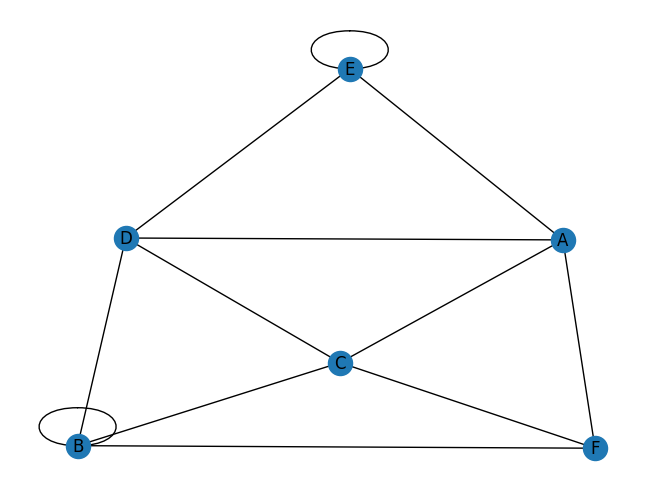

In [130]:
# 그래프 화면 출력
nx.draw(g, with_labels = True)

In [131]:
# 엣지 제거
g.remove_edge("C","D")

In [132]:
g.edges

EdgeView([('A', 'C'), ('A', 'D'), ('A', 'E'), ('A', 'F'), ('B', 'B'), ('B', 'C'), ('B', 'D'), ('B', 'F'), ('C', 'F'), ('D', 'E'), ('E', 'E')])

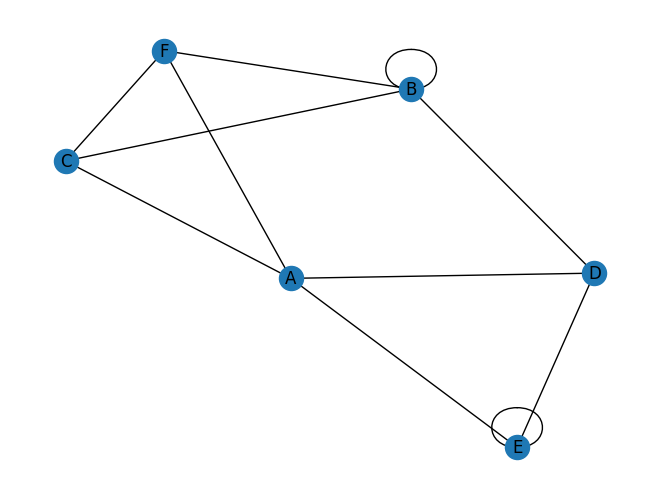

In [133]:
nx.draw(g, with_labels = True)

## 방향성 그래프 생성하기

In [134]:
G = nx.DiGraph()

In [135]:
G.add_nodes_from(['A','B','C','D','E'])

In [136]:
G.add_edge('A','C',weight=8)
G.add_edge('A','E',weight=10)
G.add_edge('B','A',weight=15)
G.add_edge('C','E',weight=23)
G.add_edge('D','B',weight=17)
G.add_edge('D','A',weight=27)
G.add_edge('E','B',weight=11)
G.add_edge('E','D',weight=5)

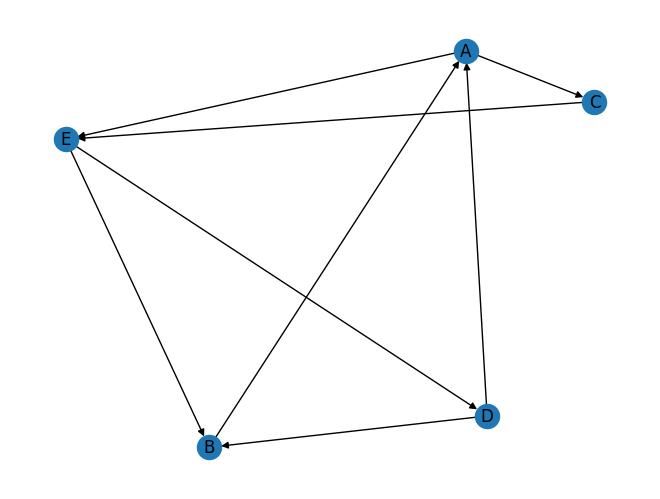

In [137]:
nx.draw(G, with_labels=True)

## Degree 이해하기

In [138]:
# in/out degree 출력
G.degree

DiDegreeView({'A': 4, 'B': 3, 'C': 2, 'D': 3, 'E': 4})

In [139]:
# in_degree 출력
G.in_degree()

InDegreeView({'A': 2, 'B': 2, 'C': 1, 'D': 1, 'E': 2})

In [140]:
# out_degree 출력
G.out_degree()

OutDegreeView({'A': 2, 'B': 1, 'C': 1, 'D': 2, 'E': 2})

## 전임노드(Predecessor node)와 후임노드(Successor node)란?
Successor node: Digraph에서 기준이 되는 node의 edge에 의해 다음으로 가리키는 node를 뜻한다.

Predecessor node: Digraph에서 기준이 되는 노드가 edge에 의해 가리켜지는  node를 뜻한다.

예를 들어 A를 기준으로 치면 다음으로 가리키는 C, E가 Successor node가 된다.

그리고 A를 기준으로 화살표를 받는 B,D가 Predecessor node가 된다.

In [143]:
# A의 successor nodes
list(G.successors('A'))

['C', 'E']

In [144]:
# B의 successor nodes
list(G.predecessors('A'))

['B', 'D']

## 문제 5-1: 최고의 in-degree/out-degree 비율을 갖는 지점을 찾는 함수를 작성하여라.

In [145]:
# 랜덤으로 생성되는 방향을 가진 그래프 (directed graph)
random_digraph = nx.fast_gnp_random_graph(10, 0.3, seed=None, directed=True)

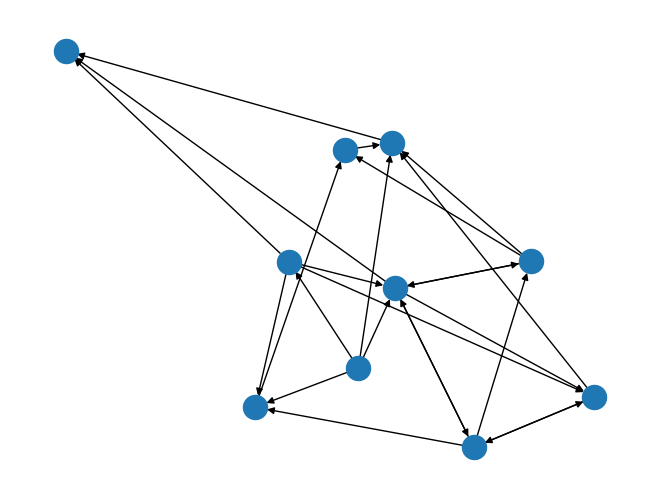

In [146]:
nx.draw(random_digraph)

In [152]:
def find_highest_custom_degree(graph):
  '''
  주어진 그래프로부터 제일 높은 custom_degree를 찾는 것을 목표한다.
  구체적으로, 각 노드에서 custom_degree는  ( in_degree * 10 - out_degree * 5 ) 로 계산된다.
  :param graph: 그래프
  :return: 최대 높은 custom degree
  '''
  highest_score = -float('inf')

  for n in graph.nodes:
    in_degree = graph.in_degree(n)
    out_degree = graph.out_degree(n)

    score = in_degree * 10 - out_degree * 5

    if score > highest_score:
      highest_score = score

  return highest_score

In [153]:
find_highest_custom_degree(random_digraph)

35

## 문제 5-2: 넓이 우선 검색(Breadth-First Search)  구현하기

넓이 우선검색은 Level 우선 검색이라고도 한다. 가까운 근처 이웃부터 천천히 검색하는 방법이다. 즉, 주위의 정보를 먼저 검색하고 그 다음에 점점 먼 이웃을 검색하는 방법이다.

connected_caveman_graph 는 k 크기의 l 개의 clique를 가진 caveman 그래프를 반환한다. 예로, 5-clique가 5개인 그래프를 다음과 같이 생성할 수 있다. 5-clique는 5명이 완벽하게 서로 커뮤니케이션하는 완전한 그래프라고 할 수 있다.



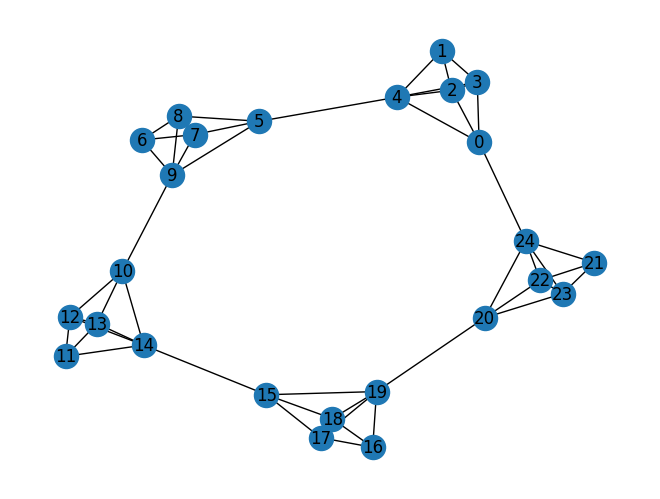

In [154]:
g =  nx.connected_caveman_graph(5, 5)
nx.draw(g, with_labels=True)

In [155]:
def bfs(graph, source):
  '''
  # 넓이우선 검색 함수를 구현하시오
  :param graph: graph는 이전 g 파라미터
  :param source: source는 시작노드
  :return: 마지막 도착 노드
  '''
  visited = set()
  queue = [source]

  visited.add(source)

  last_visited = source

  while queue:
    current_node = queue.pop(0)
    last_visited = current_node

    for neighbor in graph.neighbors(current_node):
      if neighbor not in visited:
        visited.add(neighbor)
        queue.append(neighbor)

  return last_visited

In [156]:
bfs(g, 0)

11

# 소셜네트워크 분석 이해하기
그래프 네트워크에서 노드간의 직접적인 연결은 1 홉(hop)에 있다고 표현한다. 예를 들면, (A)-(B)-(C) 가 3개로 노드로 이루어진 그래프에서, A와 C는 2 hops 관계 있다고 본다. 따라서, 큰 hop은 해당 노드로 부터 멀리 떨어져 있는 노드로 볼 수 있다. 소셜네트워크에서는, 친구와 친구 사이의 관계가 먼 것으로 이야기한다.

In [157]:
# source 로부터 n-HOPS가 떨어진 노드들을 찾는 방법
HOPS = 2
[n for n, d in nx.shortest_path_length(g ,source=0).items() if d==HOPS]

[1, 5, 20, 21, 22, 23]

## 문제 6-1: 인플루언서로부터 전체 노드의 50%를 차지하게되는 최소 HOPS를 계산하여라.
인플루언서 p가 주어졌을때, p가 전체 노드의 50%를 알게 되는 최소 HOPS을 찾는 함수 find_min_hops_with_above_50_friends()을 구현하시오

Watts-Strogatz 그래프 모델은 Small-World 그래프를 표현합니다. Small-World 그래프는 많은 노드가 하나 이상의 이웃을 가지지 않는, 일부 노드에 많은 이웃을 가지게되는 그래프입니다. 예로, 우리가 알고있는 인플루언서 기반 소셜네트워크, 온라인 상점 내 인기상품 기반 상품 네트워크 등은 이러한 Small World 그래프 입니다. 또한, 실제 사람들의 커뮤니티에서도 많은 사람들은 적은 수의 사람들을 알고 있으며, 소수의 사람들이 많은 인맥을 가지는 구조로 보여주게 됩니다.
참조링크: (Small-World 그래프)[https://en.wikipedia.org/wiki/Small-world_network]



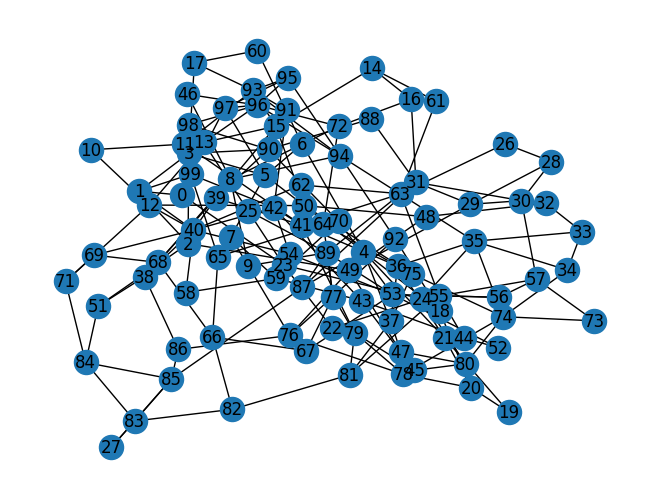

In [163]:
# watts_strogatz_graph는 Small World 그래프 생성을 위해 다음과 같은 arguments을 input으로 받아 그래프를 생성합니다.
# n은 노드의 수, k는 각 노드마다 연결될 이웃의 수(edge의 수), p= 연결될 확률
g = nx.watts_strogatz_graph(n = 100, k= 5, p = 0.5, seed=None)
nx.draw(g, with_labels=True)

In [162]:
'''
prompt
네트워크 분석에서 그래프 네트워크에서 노드간의 직접적인 연결은 1 홉(hop)에 있다고 표현한다. 예를 들면, (A)-(B)-(C) 가 3개로 노드로 이루어진 그래프에서, A와 C는 2 hops 관계 있다고 본다. 따라서, 큰 hop은 해당 노드로 부터 멀리 떨어져 있는 노드로 볼 수 있다. 소셜네트워크에서는, 친구와 친구 사이의 관계가 먼 것으로 이야기한다.

# source 로부터 n-HOPS가 떨어진 노드들을 찾는 방법
HOPS = 2
[n for n, d in nx.shortest_path_length(g ,source=0).items() if d==HOPS] 는
[1, 5, 20, 21, 22, 23]

인플루언서 p가 주어졌을때, p가 전체 노드의 50%를 알게 되는 최소 HOPS을 찾는 함수 find_min_hops_with_above_50_friends()을 구현해
'''
def find_min_hops_with_above_50_friends(g, influencer=0, min_percent=50):
  '''
  주어진 노드가 50% 이상의 친구 노드를 가지는 최소 홉수를 찾으시오
  :param g: 그래프
  :param influencer: 타겟이 될 인플루언서 노드
  :param min_percent: 최소 요구해야할 노드의 비율 실제 필요한 노드 수는 전체 노드 수(g.nodes) * 0.5 이상이 되어야한다.
  :return: 최소 hops 로 반환해야한다.
  '''

  total_nodes = g.number_of_nodes()

  # 빈 그래프이거나 노드가 1개일 경우
  if total_nodes == 0:
    return 0

  # 도달해야 할 노드의 수 계산
  target_node_count = total_nodes * (min_percent / 100.0)

  # 인플루언서로부터 모든 노드까지의 최단 거리(홉)를 계산
  path_lengths = nx.shortest_path_length(g, source=influencer)

  # 홉(hops) 수를 0부터 1씩 늘려가며 검사
  for hops in range(total_nodes):

    # 현재 홉(hops) *이하*의 거리에 있는 모든 노드의 수를 계산
    # (path_lengths.values()는 거리(d) 값들의 목록)
    nodes_within_hops = [d for d in path_lengths.values() if d <= hops]
    current_count = len(nodes_within_hops)

    # 누적된 노드 수가 목표치를 넘었는지 확인
    if current_count >= target_node_count:
      return hops # 목표를 만족하는 최소 홉(hops)을 반환

  # (만약 그래프가 연결되어 있지 않아 50%에 도달하지 못하는 경우 등)
  # 최대 홉 수를 반환
  return total_nodes - 1